In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

# Import Data

In [2]:
df = pd.read_csv('csv/Ming12Jun67_V8_Group.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'csv/Ming12Jun67_V8_Group.csv'

In [44]:
df.head()

,number,order_item_total,order_total,order_state,order_shipment_total,order_completed_at,order_currency,order_promo_total,order_item_count,order_shipping_discount,...,shipment_cost,geo_province,geo_district,shipping_method_name,shipping_met_max_weight,shipping_met_min_weight,total_quantity_variants,total_cost_variants,total_weight_variants,total_volume_variants
0,R000053403,311.0,340.0,complete,29.0,2023-11-29,THB,0.0,10,0.0,...,29.0,กรุงเทพมหานคร,เขตบางกะปิ,Standard Delivery - คำสั่งซื้อของท่านจะถูกจัดส...,100.000,0.0,10,311.0,8.58,NaN
1,R000081320,299.0,307.0,complete,8.0,2023-08-09,THB,0.0,2,0.0,...,8.0,กรุงเทพมหานคร,เขตบางกอกน้อย,ค่าส่ง 8 บาท! กทม. นนทบุรี ปทุมธานี และสมุทรปร...,99999.999,0.0,2,299.0,3.80,NaN
2,R000083700,492.0,521.0,complete,29.0,2024-01-25,THB,0.0,6,0.0,...,29.0,กรุงเทพมหานคร,เขตบางเขน,Priority Delivery - รับสินค้าวันพรุ่งนี้ก่อน 1...,100.000,0.0,6,492.0,7.60,NaN
3,R000083700,492.0,521.0,complete,29.0,2024-01-25,THB,0.0,6,0.0,...,29.0,กรุงเทพมหานคร,เขตบางเขน,Priority Delivery - รับสินค้าวันพรุ่งนี้ก่อน 1...,100.000,0.0,6,492.0,7.60,NaN
4,R000083700,492.0,521.0,complete,29.0,2024-01-25,THB,0.0,6,0.0,...,29.0,กรุงเทพมหานคร,เขตบางเขน,Standard Delivery - คำสั่งซื้อของท่านจะถูกจัดส...,100.000,0.0,6,492.0,7.60,NaN


In [45]:
df.shape

(136441, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136441 entries, 0 to 136440
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   number                   136441 non-null  object 
 1   order_item_total         136441 non-null  float64
 2   order_total              136441 non-null  float64
 3   order_state              136441 non-null  object 
 4   order_shipment_total     136441 non-null  float64
 5   order_completed_at       136441 non-null  object 
 6   order_currency           136441 non-null  object 
 7   order_promo_total        136441 non-null  float64
 8   order_item_count         136441 non-null  int64  
 9   order_shipping_discount  136441 non-null  float64
 10  spree_shipments_id       136441 non-null  int64  
 11  shipment_cost            136441 non-null  float64
 12  geo_province             125714 non-null  object 
 13  geo_district             124703 non-null  object 
 14  ship

# Data Preprocessing

In [47]:
# แปลงคอลัมน์ order_completed_at เป็น datetime
df['order_completed_at'] = pd.to_datetime(df['order_completed_at'])

# Group by คอลัมน์ order_completed_at และนับจำนวน order ที่ไม่ซ้ำกัน
df_order = df.groupby(df['order_completed_at'])['number'].nunique().reset_index()
# df_order['total_quantity'] = df.groupby(df['order_completed_at'])['total_quantity_variants'].sum()

# เปลี่ยนชื่อคอลัมน์
df_order.columns = ['order_completed_at', 'unique_order_count']

# เรียงลำดับวันที่
df_order = df_order.sort_values('order_completed_at')

# แสดง DataFrame ที่ได้
print(df_order.head())
print(df_order.tail())

  order_completed_at  unique_order_count
0         2023-01-01                  15
1         2023-01-02                  32
2         2023-01-03                  89
3         2023-01-04                  73
4         2023-01-05                  67
    order_completed_at  unique_order_count
524         2024-06-08                 124
525         2024-06-09                 115
526         2024-06-10                 113
527         2024-06-11                 132
528         2024-06-12                  50


In [48]:
date_to_find = pd.Timestamp('2024-06-11').date()
df_order_filtered = df_order[df_order['order_completed_at'].dt.date == date_to_find]
df_order_filtered

,order_completed_at,unique_order_count
527,2024-06-11,132


In [49]:
df_order = df_order[df_order['order_completed_at'] < '2024-06-12']

In [50]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_completed_at  528 non-null    datetime64[ns]
 1   unique_order_count  528 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.4 KB


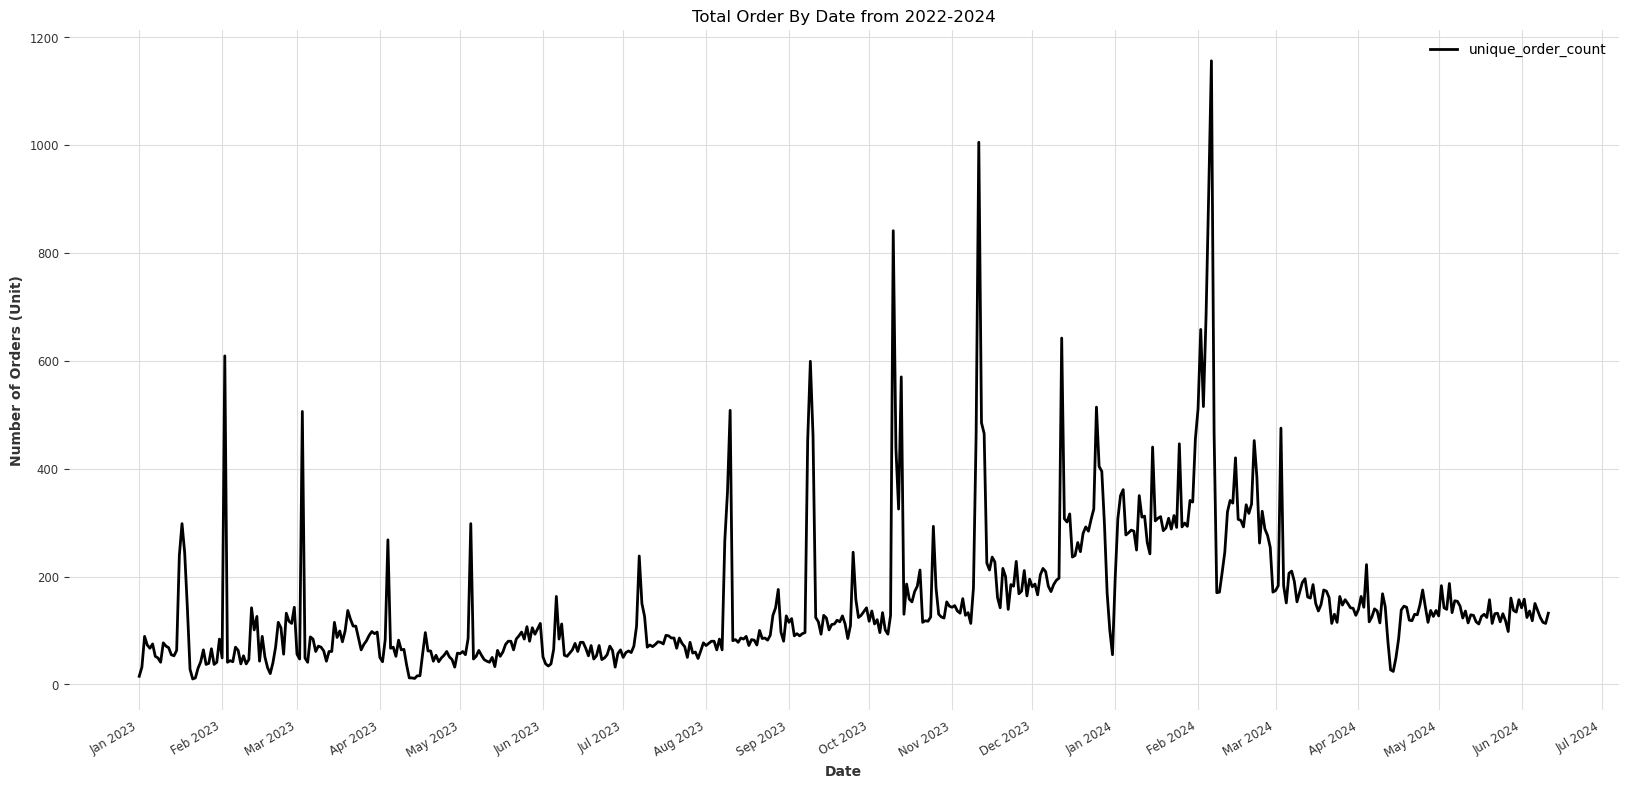

In [51]:
import matplotlib.dates as mdates


series = TimeSeries.from_dataframe(df_order, 'order_completed_at', 'unique_order_count')

# ดูข้อมูลเบื้องต้นและปรับขนาดของภาพ
plt.figure(figsize=(20, 10))  # ปรับขนาดของภาพ (กว้าง x สูง)
series.plot()

# ตั้งค่ารูปแบบของวันที่บนแกน x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()  # ปรับให้วันที่ไม่ซ้อนกัน

# กำหนด Title และชื่อของแกน x และ y
plt.title('Total Order By Date from 2022-2024')
plt.xlabel('Date')
plt.ylabel('Number of Orders (Unit)')

plt.show()

# Feature Engineering

# Modeling And Evaluate Model

In [52]:
from darts.models import LinearRegressionModel, Prophet

<Axes: xlabel='order_completed_at'>

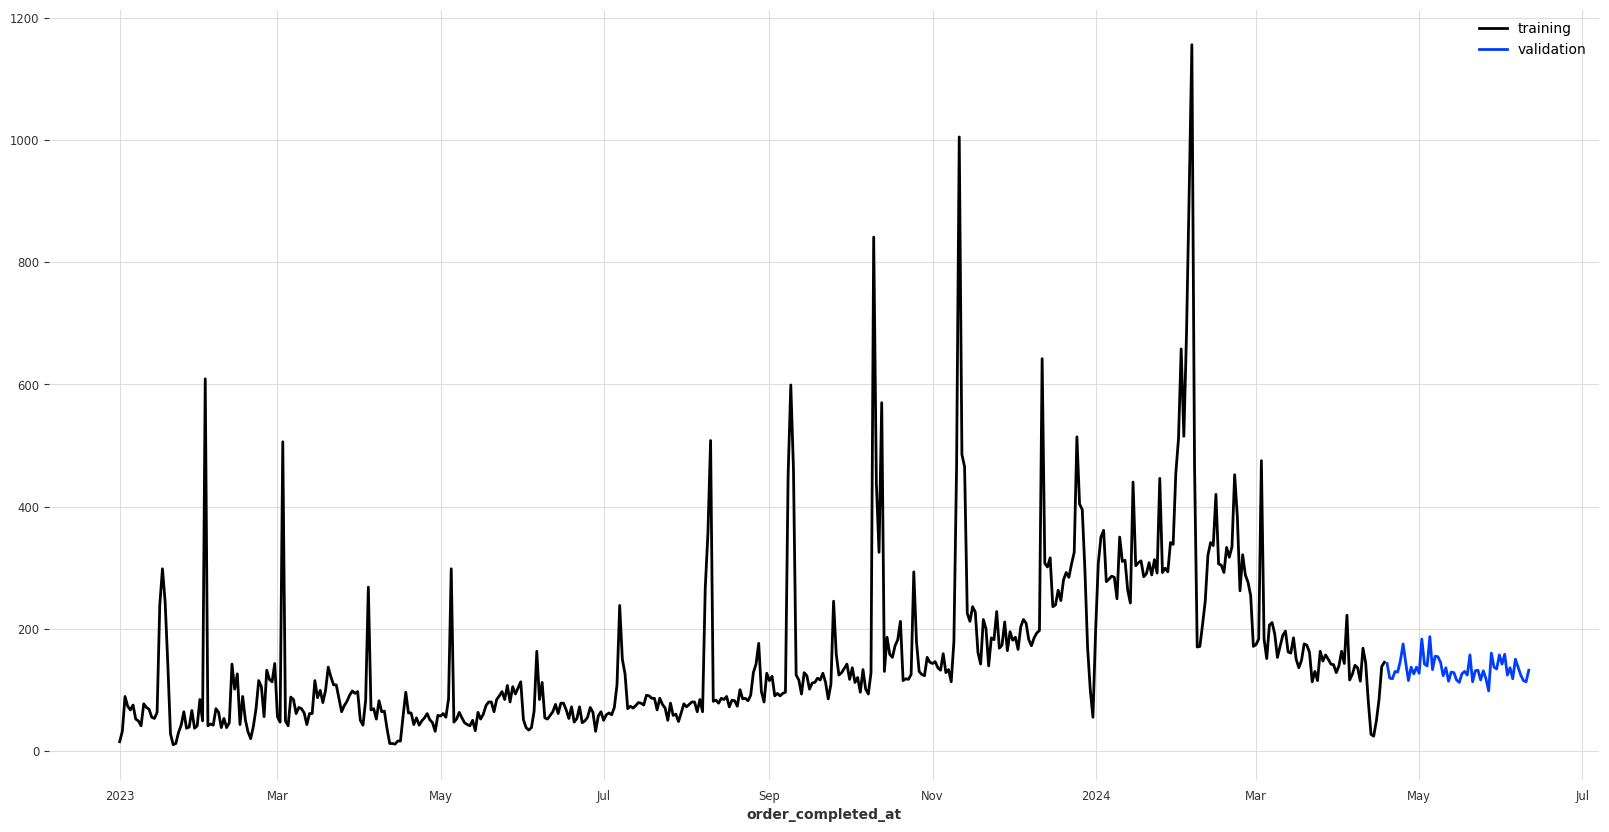

In [53]:
from darts.metrics import mape, mse, mae, rmse

# แบ่งข้อมูลออกเป็น train และ test set
train, val = series.split_before( .9)
plt.figure(figsize=(20, 10))  # ปรับขนาดของภาพ (กว้าง x สูง)
train.plot(label="training")
val.plot(label="validation")


In [54]:
# สร้างและฝึก Linear Regression Model
best_lag = 1
for i in range(1,101):
    model_lr = LinearRegressionModel(lags=i)
    model_lr.fit(train)


    # ทำนายค่าใน validation set
    pred_lr = model_lr.predict(len(val))

    # คำนวณค่า MAPE (Mean Absolute Percentage Error)
    error_lr = mape(val, pred_lr)
    if i==1:
        error_best_lag = error_lr
    else:
        if error_lr < error_best_lag:
            error_best_lag = error_lr; best_lag = i

print(f'Linear Regression MAPE: lag {best_lag} {error_best_lag}')
print(f'MSE {mse(val, pred_lr)}')
print(f'MAE {mae(val, pred_lr)}')
print(f'RMSE {rmse(val, pred_lr)}')

Linear Regression MAPE: lag 33 11.772810881886501
MSE 78270.4393719566
MAE 264.6020463607431
RMSE 279.7685460732793


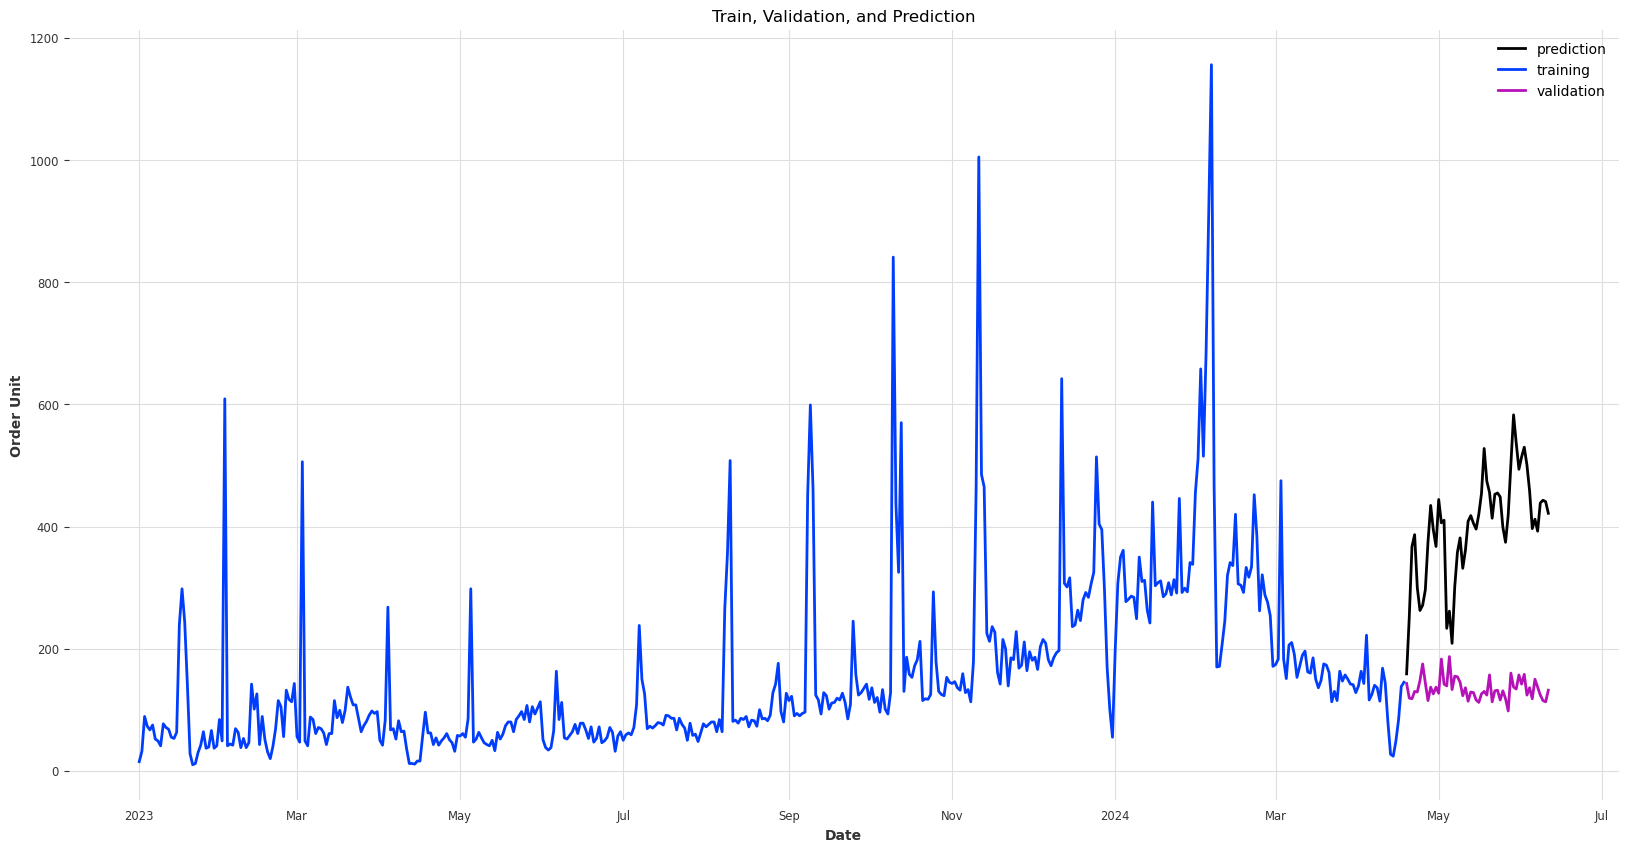

In [55]:
plt.figure(figsize=(20, 10))  # ปรับขนาดของภาพ (กว้าง x สูง)
pred_lr = model_lr.predict(len(val))
pred_lr.plot(label="prediction")
train.plot(label="training")
val.plot(label="validation")

plt.legend()
plt.title('Train, Validation, and Prediction')
plt.xlabel('Date')
plt.ylabel('Order Unit')
plt.show()

In [56]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from darts import TimeSeries
# from darts.models import LinearRegressionModel
# from darts.metrics import mape
# import matplotlib.dates as mdates



# # แบ่งข้อมูลออกเป็น train และ test set
# train, val = series.split_before(0.8)

# # สร้างฟังก์ชันสำหรับการทดสอบค่า lag ต่างๆ
# def find_best_lag(train, val, max_lag):
#     best_lag = 1
#     best_mape = float('inf')

#     for lag in range(1, max_lag + 1):
#         model_lr = LinearRegressionModel(lags=lag)
#         model_lr.fit(train)
#         pred_lr = model_lr.predict(len(val))
#         error_lr = mape(val, pred_lr)
#         print(f'Lag: {lag}, MAPE: {error_lr}')

#         if error_lr < best_mape:
#             best_mape = error_lr
#             best_lag = lag

#     return best_lag, best_mape

# # กำหนดค่า max_lag ที่ต้องการทดสอบ
# max_lag = 24

# # หา lag ที่ดีที่สุด
# best_lag, best_mape = find_best_lag(train, val, max_lag)

# print(f'Best Lag: {best_lag}, Best MAPE: {best_mape}')

In [57]:
# predict future
best_model = LinearRegressionModel(lags=33)
best_model.fit(series)

LinearRegressionModel(lags=33, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, output_chunk_shift=0, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True)

In [58]:
series.pd_dataframe().tail()

component,unique_order_count
order_completed_at,
2024-06-07,137.0
2024-06-08,124.0
2024-06-09,115.0
2024-06-10,113.0
2024-06-11,132.0


In [59]:
forecast = best_model.predict(7)
forecast = forecast.pd_dataframe().reset_index()
forecast.columns = ['Date', 'Total Order']
forecast.tail(7)


,Date,Total Order
0,2024-06-12,135.160266
1,2024-06-13,128.881656
2,2024-06-14,136.132079
3,2024-06-15,134.246186
4,2024-06-16,125.293716
5,2024-06-17,127.106661
6,2024-06-18,139.307527


# Save Model

In [60]:
# from darts.models import LinearRegressionModel, Prophet

# best_model.save("linearRegressionModel_totalOrder_12Jun67.pkl")

In [61]:
# model_loaded = LinearRegressionModel.load("model/linearRegressionModel_totalOrder_12Jun67.pkl")